In [1]:
import cv2
import numpy as np

In [2]:
gaussian_kernel = np.array([
                            [1,2,1],
                            [2,4,2],
                            [1,2,1],
                            ])/16

In [3]:
# Set up function to run the convolution on an image
def concolve2d(image,kernel):
    # Get Dimensions
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Calculate Padding
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2

    # Apply Padding
    padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')

    # Create an output image
    output = np.zeros_like(image)

    # Apply convolution
    for i in range(image_height):
        for j in range(image_width):
            output[i,j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output

In [4]:
image = cv2.imread('/home/pswish/Downloads/wine.jpeg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# convolved_image = concolve2d(image,gaussian_kernel)




In [ ]:
# cv2.imshow('Convolved Image', convolved_image)
# cv2.waitKey(0)
#I might want to modify this to matplot print since that works better

In [ ]:
# cv2.destroyAllWindows()

In [ ]:
image = cv2.imread('/home/pswish/Downloads/wine.jpeg', cv2.IMREAD_GRAYSCALE)

In [5]:
from scipy import ndimage

In [22]:
result = ndimage.convolve(image, gaussian_kernel, mode='reflect')

In [23]:
import matplotlib.pyplot as plt 

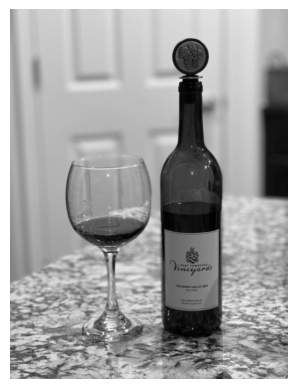

In [24]:
# Display the result 
plt.imshow(result, cmap='gray') 
plt.axis('off') 
plt.show()

In [10]:
# Now trying a sharpening kernel
sharpening_kernel = ([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

In [11]:
result = ndimage.convolve(image, sharpening_kernel, mode='reflect')

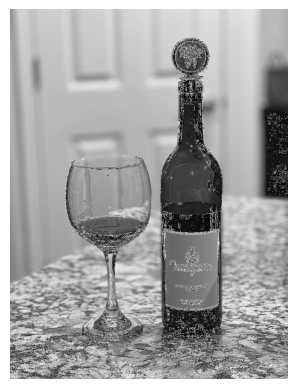

In [12]:
# Display the result 
plt.imshow(result, cmap='gray') 
plt.axis('off') 
plt.show()

In [14]:
# Now trying something called the sobel_x kernel
sobel_x = np.array([[-1, 0, 1],[-2,0,2], [-1,0,1]])

In [17]:
result = ndimage.convolve(image, sobel_x, mode='reflect')

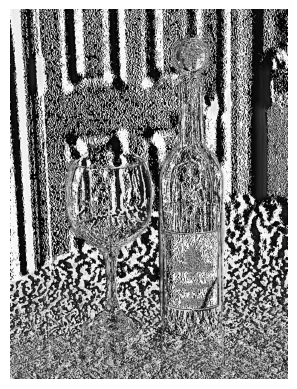

In [18]:
# Display the result 
plt.imshow(result, cmap='gray') 
plt.axis('off') 
plt.show()

In [28]:
# Now trying something called the sobel_y kernel
sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
result = ndimage.convolve(image, sobel_y, mode='reflect')

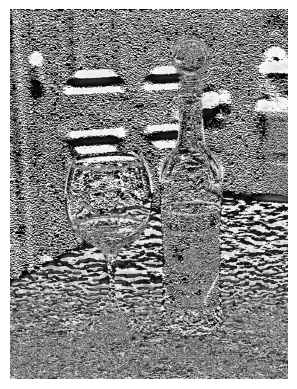

In [29]:
# Display the result 
plt.imshow(result, cmap='gray') 
plt.axis('off') 
plt.show()

In [31]:
# Trying the emboss kernel
emboss_kernel = np.array([[2,0,0], [0,-1,-1], [0,-1,-1]])
result = ndimage.convolve(image, emboss_kernel, mode='reflect')

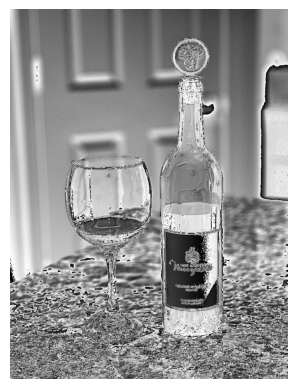

In [32]:
# Display the result 
plt.imshow(result, cmap='gray') 
plt.axis('off') 
plt.show()

In [35]:
# Trying the outline kernel
outline_kernel = np.array([[0, -1, 0],[-1,4,-1],[0,-1,0]])
result = ndimage.convolve(image, outline_kernel, mode='reflect')

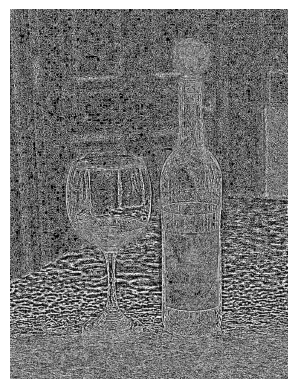

In [36]:
# Display the result 
plt.imshow(result, cmap='gray') 
plt.axis('off') 
plt.show()

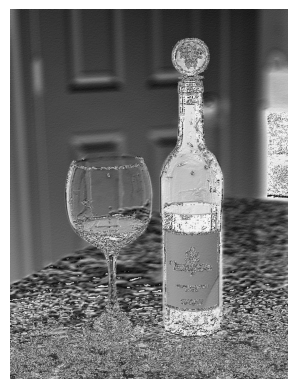

In [40]:
# Trying 4 numbers in the array to see what happens
outline_kernel = np.array([[0, -1, 0,2,0],[-1,4,-1, 0, 2],[0,-1,0, -1, -4]])
result = ndimage.convolve(image, outline_kernel, mode='reflect')
plt.imshow(result, cmap='gray') 
plt.axis('off') 
plt.show()

## Task 4 : Harris corner detection

In [3]:
import cv2
import numpy as np
image = cv2.imread('/home/pswish/Downloads/wine.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [4]:
#3 Apply harris corner detection 
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

In [6]:
#4 Threshold and mark the corners in red
image[dst > 0.01 * dst.max()] = [0, 0, 255] 

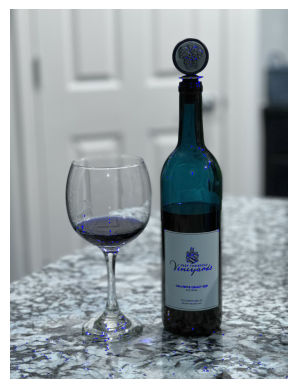

In [8]:
import matplotlib.pyplot as plt 
plt.imshow(image, cmap='gray') 
plt.axis('off') 
plt.show()

In [ ]:
cv2.imshow('Harris Corners', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()


### Fast Corner Detection

In [1]:
import cv2
import numpy as np
image = cv2.imread('/home/pswish/Downloads/wine.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [2]:
# Create the FAST object
fast = cv2.FastFeatureDetector_create()

In [3]:
# Detect the keypoints
keypoints = fast.detect(gray, None)

In [4]:
# Draw the keypoitns on the image
image_with_kp = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

In [ ]:
cv2.imshow('FAST Corners', image_with_kp) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

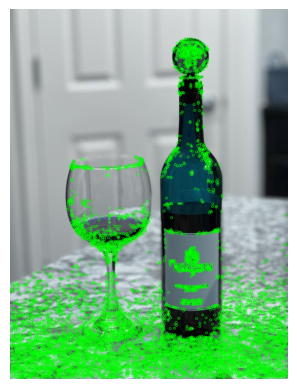

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(image_with_kp, cmap='gray') 
plt.axis('off') 
plt.show()